<a href="https://colab.research.google.com/github/KhuzaimaHassan/Data-Mining/blob/main/Final_lab_DT_22302_Khuzaima_Hassan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("spiral2.csv")
print(df.head(),"\n")
print(df.info())

            x           y  color
0  281.762010  186.024837      1
1  212.503675  199.031585      0
2  180.014895  259.379060      0
3  302.372404  284.465182      0
4  328.759727  176.945518      1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       9325 non-null   float64
 1   y       9325 non-null   float64
 2   color   9325 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 218.7 KB
None


In [ ]:

print(df.describe())
print(df.isnull().sum())


                 x            y        color
count  9325.000000  9325.000000  9325.000000
mean    278.456979   216.255887     0.492225
std      59.955648    63.867030     0.499966
min     156.931211    87.326660     0.000000
25%     228.888277   165.781139     0.000000
50%     273.745596   215.391483     0.000000
75%     328.882058   265.487807     1.000000
max     412.547345   351.077533     1.000000
x        0
y        0
color    0
dtype: int64



Unique values in 'color':
[1 0]

Value counts for 'color':
color
0    4735
1    4590
Name: count, dtype: int64


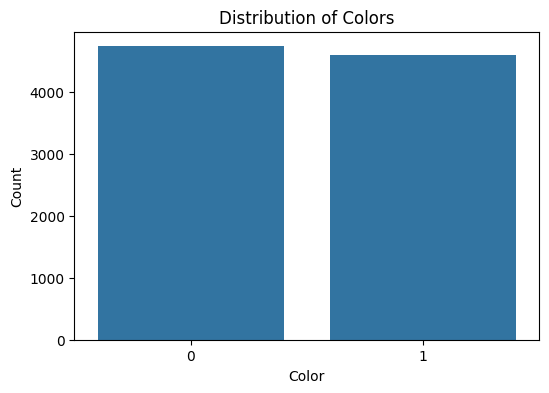

In [ ]:


print("\nUnique values in 'color':")
print(df['color'].unique())


print("\nValue counts for 'color':")
print(df['color'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='color', data=df)
plt.title('Distribution of Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()



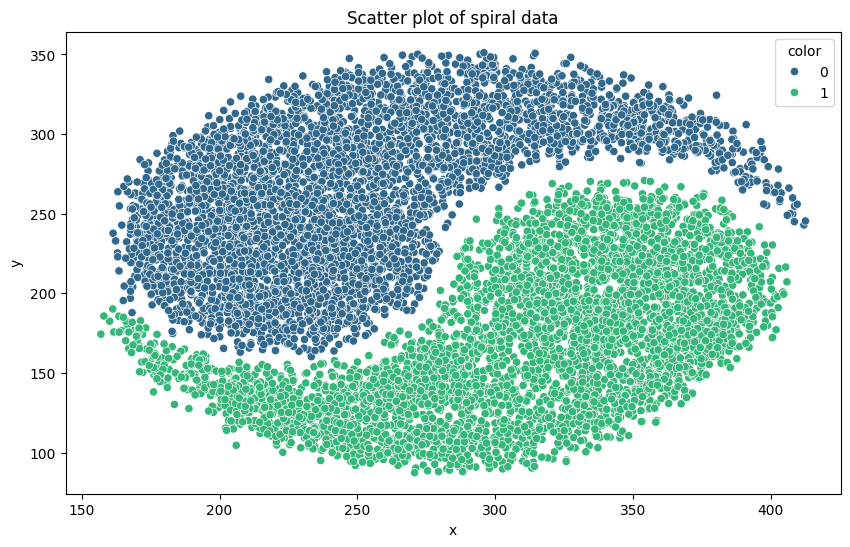

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='color', palette='viridis')
plt.title('Scatter plot of spiral data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Standard Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])


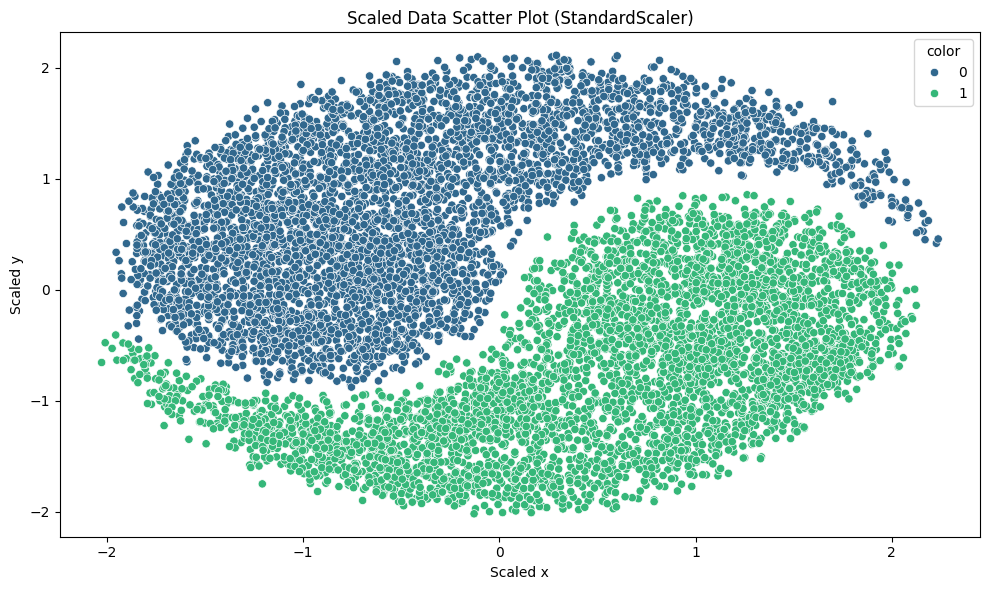

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='x', y='y', hue='color', palette='viridis')
plt.title('Scaled Data Scatter Plot (StandardScaler)')
plt.xlabel('Scaled x')
plt.ylabel('Scaled y')

plt.tight_layout()
plt.show()


In [ ]:

print("\nDescriptive statistics after scaling:")
print(df_scaled[['x', 'y']].describe())


Descriptive statistics after scaling:
                  x             y
count  9.325000e+03  9.325000e+03
mean  -8.610330e-16  5.295734e-17
std    1.000054e+00  1.000054e+00
min   -2.027036e+00 -2.018822e+00
25%   -8.268005e-01 -7.903523e-01
50%   -7.858536e-02 -1.353516e-02
75%    8.410848e-01  7.708916e-01
max    2.236613e+00  2.111087e+00


## KMeans

In [ ]:

from sklearn.cluster import KMeans

X_scaled = df_scaled[['x', 'y']]

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)



KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
print(X_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       9325 non-null   float64
 1   y       9325 non-null   float64
dtypes: float64(2)
memory usage: 145.8 KB
None


In [ ]:
df_scaled['kmeans_cluster'] = kmeans.labels_

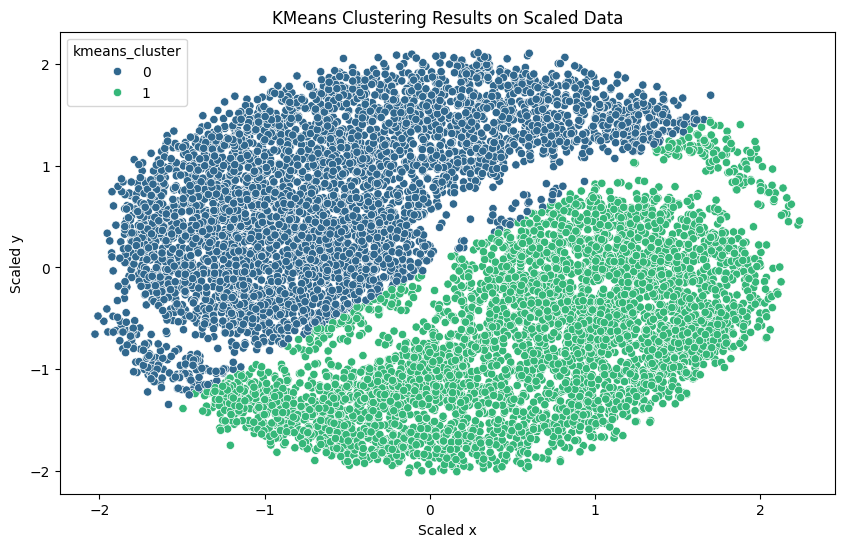

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='x', y='y', hue='kmeans_cluster', palette='viridis', legend='full')
plt.title('KMeans Clustering Results on Scaled Data')
plt.xlabel('Scaled x')
plt.ylabel('Scaled y')
plt.show()

## DBSCAN


In [ ]:

from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.09, min_samples=5)
dbscan.fit(X_scaled)


DBSCAN(eps=0.09)

In [ ]:

df_scaled['dbscan_cluster'] = dbscan.labels_

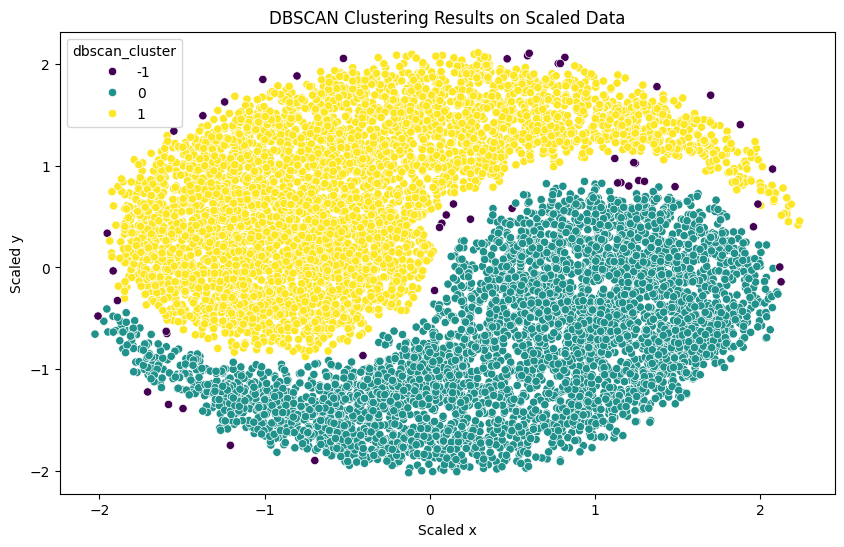

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='x', y='y', hue='dbscan_cluster', palette='viridis', legend='full')
plt.title('DBSCAN Clustering Results on Scaled Data')
plt.xlabel('Scaled x')
plt.ylabel('Scaled y')
plt.show()


In [ ]:

n_clusters = len(set(df_scaled['dbscan_cluster'])) - (1 if -1 in df_scaled['dbscan_cluster'] else 0)
print(f"\nNumber of clusters found by DBSCAN: {n_clusters}")

n_noise = list(df_scaled['dbscan_cluster']).count(-1)
print(f"Number of noise points: {n_noise}")


Number of clusters found by DBSCAN: 3
Number of noise points: 48
